# Assignment 1: Face-Classification Three-Ways

In this assignment you will implement a face classifier and train it using three different approaches:
* Logistic Regression using Stochastic Gradient Descent
* Logistic Regression using Newton's Method
* Gaussian Discriminant Analysis

## Setup

First import the required packages and do some setup:

In [1]:
%load_ext autoreload
%autoreload 2

import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split

from assignment1 import sigmoid, cost_function, gradient_function, logistic_SGD, logistic_Newton, gda, predict_function

# Set default parameters for plots
plt.rcParams['figure.figsize'] = (12.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Now load the data set. It consists of 19'832 grayscale images of size 24 x 24. Each image has a corresponding label which we set to 0 for non-face and 1 for face.

In [2]:
# Load the dataset
data = loadmat('faces.mat')
labels = np.squeeze(data['Labels'])
labels[labels == -1] = 0    # Want labels in {0, 1}
data = data['Data']

We divide the dataset into two subsets: One for training and one for testing. This approach is called cross-validation and is standard practice in Machine Learning.
The classifier will be learnt only on the data in the training set! The test set then gives you an estimate of how well the classifier will perform on new unseen data.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3)
num_train = X_train.shape[0]
num_test = X_test.shape[0]

# As a sanity check, we print out the size of the training and test data.
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (13882, 576)
Training labels shape:  (13882,)
Test data shape:  (5950, 576)
Test labels shape:  (5950,)


Notice that the images are stored as vectors now. Let's visualize some examples to check that the data is fine. We of course have to reshape the images first:

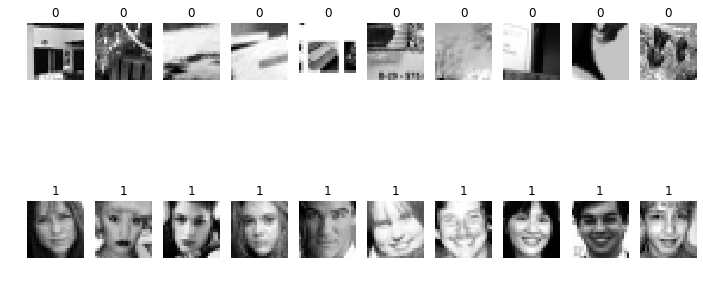

In [4]:
# Visualize some examples from the dataset.
samples_per_class = 10
classes = [0, 1]
train_imgs = np.reshape(X_train, [-1, 24, 24], order='F')

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(np.equal(y_train, cls))
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = y * samples_per_class + i + 1
        plt.subplot(len(classes), samples_per_class, plt_idx)
        plt.imshow(train_imgs[idx])
        plt.axis('off')
        plt.title(cls)
plt.show()

Finally, we add the intercept term by concatenating a vector of ones to the train and test data:

In [5]:
# Add intercept to X and normalize to range [0, 1]
X_train = np.concatenate((np.ones((num_train, 1)), X_train/255.), axis=1)
X_test = np.concatenate((np.ones((num_test, 1)), X_test/255.), axis=1)

## Exercise 1: Sigmoid [5 Points]

**TODO**: Implement the sigmoid function in ***assignment1/sigmoid.py*** according to the specifications. 

**NOTE**: The function should work with inputs of arbitrary shape!

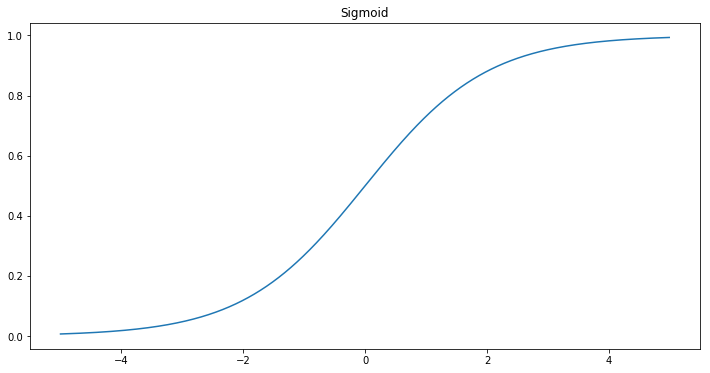

In [7]:
# Test your sigmoid
z_test = np.arange(-5, 5, 0.01)
g_test = sigmoid(z_test)
plt.plot(z_test, g_test)
plt.title('Sigmoid')
plt.show()

## Exercise 2: Log-Likelihood [10 Points]

**TODO**: Implement the log-likelihood for Logistic Regression in ***assignment1/cost_function.py*** according to specs.

What value of the cost do you expect with a parameter vector *theta* of all zeros? Check your implementation for this!

**Hint**: No for-loops are required! Use np.sum and np.dot instead...

In [ ]:
# Test your cost-function
theta_0 = np.zeros(X_train.shape[1])
l_0 = cost_function(theta_0, X_train, y_train)
print('Log-likelihood with initial theta: ', l_0)

## Exercise 3: The Gradient [10 Points]

**TODO**: Implement the gradient of the log-likelihood for Logistic Regression in ***assignment1/gradient_function.py*** according to specs. 

**NOTE**: Your implementation should work with a single example x (i.e., a vector) or multiple examples X (i.e., a matrix).

Consider again what value you would expect with *theta* equal to zero and test your implementation:


In [ ]:
# Test your implementation
x_test = np.ones([2, 10])
theta_0 = np.zeros(10)
grad_0 = gradient_function(theta_0, x_test, 1.0)
print(grad_0)

# Exersice 4: The Learning Algorithmms

This is the main part of the assignment. Correctness of the implementation is required to get the points (work on speed later). 

## a) Logistic Regression with SGD [15 Points]

**TODO**: Implement the function in ***assignment1/logistic_SGD.py*** according to specs.

## b) Logistic Regression with Newton's Method [15 Points]

**TODO**: Implement the fuction in ***assignment1/logistic_Newton.py*** according to specs.

## c) Gaussian Discriminant Analysis [15 Points]

**TODO**: Implement the function in ***assignment1/gda.py*** according to specs.



***Hint***: No additional for-loops are required!

In [ ]:
method = 'sgd'

# We'll meausure the execution time
start = time.time()

if method == 'sgd':
    theta, losses = logistic_SGD(X_train, y_train)
elif method == 'newton':
    theta, losses = logistic_Newton(X_train, y_train)
elif method == 'gda':
    theta, losses = gda(X_train, y_train)
else:
    raise ValueError('Method not recognised!')

exec_time = time.time()-start
print('Total execution time: {}s'.format(exec_time))

if losses:
    plt.plot(losses)
    plt.title('Training Log-Likelihood')
    plt.show()

# We can have a look at what theta has learned to recognise as "face"
plt.imshow(np.reshape(theta[1:], [24, 24], order='F'))
plt.title('Learned theta')
plt.show()

### Exercise 6: Testing the Classifier [10 Points]

**TODO**: Implement ***assignment1/predict_function.py*** according to specs. 

Test your implementation with the intial all zero theta as well! Does it match your expectation?

***Hint***: All the methods should score above 90% on both the test and train set!

In [ ]:
# Test the final classifiers
methods = ['sgd', 'newton', 'gda']

for method in methods:
    print('Evaluating {}\n'.format(method))
    start = time.time()

    if method == 'sgd':
        theta, losses = logistic_SGD(X_train, y_train)
    elif method == 'newton':
        theta, losses = logistic_Newton(X_train, y_train)
    elif method == 'gda':
        theta, losses = gda(X_train, y_train)
    else:
        raise ValueError('Method not recognised!')

    exec_time = time.time()-start
    print('Total execution time: {}s'.format(exec_time))

    pred_test, accuracy_test = predict_function(theta, X_test, y_test)
    pred_train, accuracy_train = predict_function(theta, X_train, y_train)
    print('\nTest accuracy: {}'.format(accuracy_test))
    print('Training accuracy: {}\n'.format(accuracy_train))

### Exercise 7: Discussion [20 Points]

Answer the following questions and justify your answers:

* Based on your results, which classifier do you prefer and why?

	***Your Answer:***
    

* SGD vs. Newton: Give advantages and disadvantages of both approaches. How would you expect the results to change if more or less data were used during training?

	***Your Answer:***

### Bonus: Make it fast! [15 Points]

Optimise your implementations by making good use of Numpy. If your implementation of one of the methods is within a factor of two of the reference implementation you'll earn 5 additional points (a total of 15 points possible for the three methods).

***Hint***: No method should be significantly slower than the others in the case of optimal implementation. On my MBP they all take less than 2 seconds.